# 1. setup and load data


## 1.1 Install dependencies and setup


we require the following libraries
* tensorflow for deep learning
* opencv-python for removing dodgy images
* matplotlib for visualizing images

In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7.post1
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.1
gast                         0.4.0
google-auth                  2.22.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.57.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.25.1
ipython                      8.14.0
jedi                         0.

You should consider upgrading via the 'C:\Users\BM\ML\machinelearningenv\Scripts\python.exe -m pip install --upgrade pip' command.


### **Importing dependencies**

In [2]:
import tensorflow as tf
import os


we are going to use os library to navigate through our files
eg 

In [3]:
os.path.join('data', 'happy')

'data\\happy'

### **Using GPU**

In order to use GPUs, you require a GPU that supports CUDA and cuDNN. This means that all GPUs earlier than 2016 are not suitable. Well, they are not entirely useless, but installing CUDA on older GPUs can be a tiring process.


### Importing Our Dataset

We will be using the [happy-sad images dataset](https://www.kaggle.com/datasets/sanidhyak/human-face-emotions?resource=download) for our project.

Please note that when unzipping the dataset, you can ignore the "angry" folder.


## 1.2 Remove dodgy images

Removing all images that


In [4]:
import cv2
import imghdr

In [5]:
# creating a variable to hold our data directory
data_dir = 'data'


if we check whats in our data directory using our variable data_dir we should expect a list

In [6]:
os.listdir(data_dir)

['Happy', 'Sad']

to return every single image in the happy directory:

In [7]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '613k1XcpYCL.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '81Vk4C.jpg',
 '988689_Wallpaper2.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog-2.jpeg',
 'cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'Duggar-Family-Secrets-Are-Exposed-in-New-Docuseries-Featuring-Jill-and-Amy-featured.png',
 'dv2

In [8]:
# creating a list that holds all acceptable extensons 
image_exts = ['jpeg','jpg','bmp','png']

### removing all unwanted images

In [9]:
# open all folders in data
for image_class in os.listdir(data_dir):
    print(image_class)

Happy
Sad


In [10]:
# open all files inside the folders
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
10-Habits-of-Happy-People-Seniors-Today.jpg
110754-utyeqqosky-1547658396.jpeg
170404-happy-workers-feature.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
1_617fd1e2590c2.jpg
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
343515-worldhappinessreport1440.jpg
35438_hd.jpg
5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png
613k1XcpYCL.jpg
7-principles-of-successful-and-happy-people.png
7VR73K6EP5ETVEOUFANWBUYJEQ.jpg
81Vk4C.jpg
988689_Wallpaper2.jpg
9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg
afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg
A_Sep20_14_1189155141.jpg
blog-2.jpeg
cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg
compassion-900x387.jpg
Dollarphotoclub_76084977-1.jpg
Duggar-Family-Secrets-Are-Exposed-in-New-Docuseries-Featuring-Jill-and-Amy-featured.png
dv2051009.jpg
e162ccda8ce0f197f8863f327add9233.jpg
file-20230208-27-3jttof.jpg
friends-happy-190821.j

In [11]:
# check if an image can be read by cv2
cv2.imread('C:/Users/BM/ML/data/Happy/1_617fd1e2590c2.jpg') # returns a matrix else returns invalid format


array([[[ 48, 122,  96],
        [ 39, 113,  87],
        [ 32, 105,  79],
        ...,
        [ 88, 203, 184],
        [ 88, 209, 189],
        [ 89, 212, 192]],

       [[ 58, 132, 106],
        [ 49, 123,  97],
        [ 42, 115,  89],
        ...,
        [ 89, 204, 185],
        [ 90, 208, 189],
        [ 88, 211, 191]],

       [[ 69, 146, 119],
        [ 61, 138, 111],
        [ 55, 129, 103],
        ...,
        [ 92, 204, 186],
        [ 91, 207, 188],
        [ 88, 209, 189]],

       ...,

       [[ 26,  25,  21],
        [ 24,  23,  19],
        [ 22,  21,  17],
        ...,
        [ 80,  76,  65],
        [ 82,  78,  67],
        [ 84,  80,  69]],

       [[ 24,  23,  19],
        [ 22,  21,  17],
        [ 22,  21,  17],
        ...,
        [ 84,  80,  69],
        [ 86,  82,  71],
        [ 88,  84,  73]],

       [[ 22,  21,  17],
        [ 21,  20,  16],
        [ 22,  21,  17],
        ...,
        [ 86,  82,  71],
        [ 88,  84,  73],
        [ 90,  86,  75]]

In [12]:

# check if an image extension is in our list 
check = imghdr.what(os.path.join(data_dir, 'happy','1_617fd1e2590c2.jpg'))
if check not in image_exts:
    print('Image not in exts list')
else:
    print('Image in list')


Image in list


In [13]:
# creating a variable to hold our data directory
data_dir = 'data'

# creating a list that holds all acceptable extensons 
image_exts = ['jpeg','jpg','bmp','png']

# combining them all using a try except clause 
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

## 1.3 Load data


### importance of Dataset in tensorflow

The `tf.data.Dataset` API in TensorFlow is important for beginners because it:

1. **Simplifies Data Handling:**
   Helps manage and process data efficiently for machine learning tasks.

2. **Speeds Up Training:**
   Optimizes data loading and preprocessing, making training faster.

3. **Avoids Bottlenecks:**
   Prevents data pipeline from slowing down GPU utilization during training.

4. **Manages Memory:**
   Handles large datasets effectively by processing data in smaller batches.

5. **Easy Transformation:**
   Allows easy application of transformations like resizing and augmentation.

6. **Works Everywhere:**
   Provides a consistent data interface across different training setups.

7. **Works with TensorFlow Tools:**
   Integrates well with other TensorFlow components, like Estimators and Keras.

8. **Handles Larger Datasets:**
   Supports sharding and distributed training for scalability.

9. **Beginner-Friendly:**
   User-friendly and easy to chain operations for building data pipelines.

10. **Improves Debugging:**
    Easily debug and profile data-related issues with TensorFlow tools.

In short, `tf.data.Dataset` simplifies data processing, makes training faster, and ensures that you're efficiently using both your GPU and memory. It's beginner-friendly and fits seamlessly into your machine learning workflow.

In [14]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [15]:
import numpy as np
from matplotlib import pyplot as plt


Sure, here's the information presented in a regular text format:

### Using `keras.utils.image_dataset_from_directory`

We'll utilize the `keras.utils.image_dataset_from_directory` function to simplify how we load our data. This function provides a few key benefits:

- **Resizing Images:** It automatically resizes images to a specified target size, ensuring consistent dimensions for our input data.

- **Random Shuffling:** The dataset is randomly shuffled, which is important to prevent our model from memorizing the order of data during training.

- **Color Mode Configuration:** You can specify the color mode of the images (grayscale, RGB, etc.), ensuring uniform data input.

- **Setting Batch Size:** Now, let's delve into what batch size means.

### Understanding Batch Size

In machine learning, the batch size refers to the number of training examples used in a single iteration. When we train a model, instead of using the entire dataset at once, we process data in smaller groups known as batches. 

In [16]:
data  = tf.keras.utils.image_dataset_from_directory('data')

Found 160 files belonging to 2 classes.


but this data is not defined ie it is mostly numbers and matrices ie tensors. so, we need to convert it into a numpy data structure

In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
data_iterator

what data_iterator does is toloop through the data and obtain batches ie number of training examples used in a single iteration. 

In [19]:
# fetch batch
batch = data_iterator.next()

In [20]:
batch[0].shape

(32, 256, 256, 3)

```python
batch[0].shape
```

This Python code prints:

```console
(32, 256, 256, 3)
```

This output indicates that our batch consists of:

- **32:** The batch size, which is the number of images in the batch.
- **256x256:** The spatial dimensions of each image, with a width and height of 256 pixels.
- **3:** The number of color channels in each image, representing the red, green, and blue color values (RGB).

This batch shape is important when designing and setting up your neural network architecture, as it determines the input dimensions that your network should expect.

In [21]:
batch[1]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

this represents what our batches labels are for example

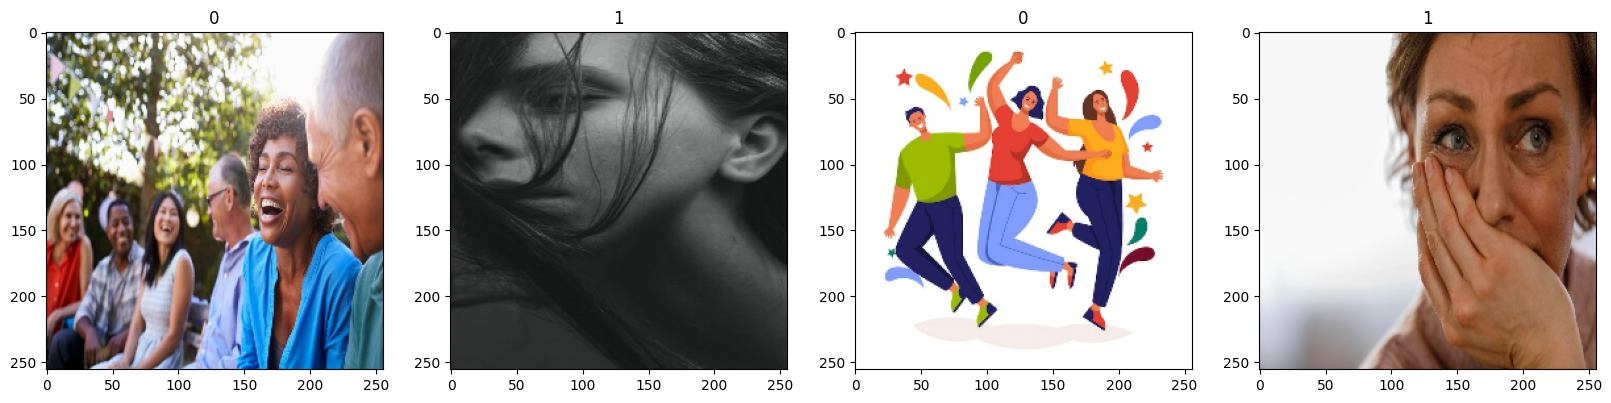

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

in our case, 0 represents happy, 1 represents sad

# 2. Preprocess Data


In [23]:
data  = tf.keras.utils.image_dataset_from_directory('data')

Found 160 files belonging to 2 classes.


## 2.1 Scale Data
When working with image data for deep learning, it's common practice to scale the pixel values to a range between 0 and 1. This can significantly enhance training efficiency and convergence. Here's how to scale your image data:

In our batch[0], pixel values currently range from 0 to 255 in a matrix format. To speed up deep learning, we'll divide the pixel values by 255, which will rescale them to a range between 0 and 1.





In [24]:
print(batch[0].min())    # Minimum pixel value before scaling
print(batch[0].max())    # Maximum pixel value before scaling

scaled = batch[0] / 255   # Scaling the pixel values
print(scaled.min())      # Minimum pixel value after scaling
print(scaled.max())      # Maximum pixel value after scaling


0.0
255.0
0.0
1.0


However, instead of applying this operation individually to each batch, we can efficiently scale all images as they flow through the data pipeline. This is achieved using the data.map() function:

In [25]:
data = data.map(lambda x,y: (x/255, y))

Now, if we look at our data, it will be scaled appropriately. We can access and visualize a batch of scaled images using the data.as_numpy_iterator() and .next() functions:

In [26]:
data_iterator = data.as_numpy_iterator()

# fetch batch
batch = data_iterator.next()

batch

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9019608 , 0.9019608 , 0.9019608 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9019608 , 0.9019608 , 0.9019608 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9019608 , 0.9019608 , 0.9019608 ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

If you want to visualize a batch of scaled images, you can use the following minimized code:

In [27]:
# minimized code 
batch = data.as_numpy_iterator().next()
batch

(array([[[[0.5391544 , 0.54901963, 0.64705884],
          [0.5411765 , 0.54901963, 0.6392157 ],
          [0.54901963, 0.54987746, 0.64142156],
          ...,
          [0.81960785, 0.8039216 , 0.80784315],
          [0.81960785, 0.8039216 , 0.80784315],
          [0.81960785, 0.8039216 , 0.80784315]],
 
         [[0.5372549 , 0.5529412 , 0.6509804 ],
          [0.54509807, 0.5529412 , 0.6431373 ],
          [0.54901963, 0.54987746, 0.64142156],
          ...,
          [0.82283527, 0.807149  , 0.81107056],
          [0.81960785, 0.8039216 , 0.80784315],
          [0.81960785, 0.8039216 , 0.80784315]],
 
         [[0.5372549 , 0.56078434, 0.654902  ],
          [0.5411765 , 0.56078434, 0.64705884],
          [0.54816175, 0.5560049 , 0.6444853 ],
          ...,
          [0.8235294 , 0.80784315, 0.8117647 ],
          [0.8235294 , 0.80784315, 0.8117647 ],
          [0.8235294 , 0.80784315, 0.8117647 ]],
 
         ...,
 
         [[0.5153799 , 0.178125  , 0.18204656],
          [0.52077

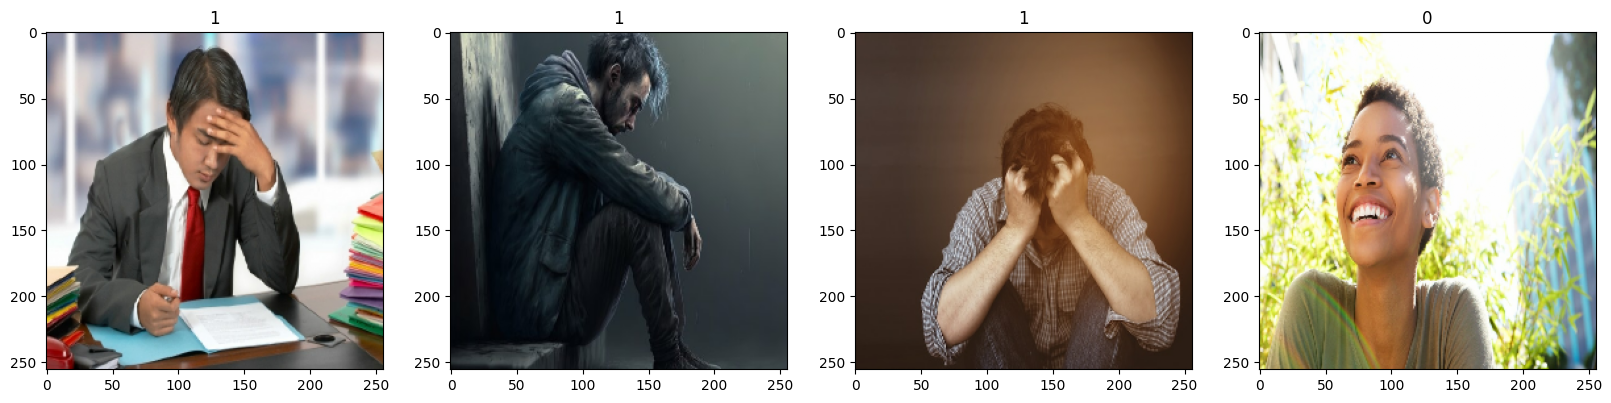

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

It's worth emphasizing that applying the data.map() operation multiple times on the same dataset can lead to unexpected behavior, including a black screen when visualizing images. To avoid this issue, you can refresh your dataset by reloading it using tf.keras.utils.image_dataset_from_directory.

```python
data  = tf.keras.utils.image_dataset_from_directory('data')
```
This will reload your dataset and allow you to continue your data processing pipeline without any unintended effects.

## 2.2 Split Data

using len(data) we can see that we have 5 batches each containing 32 images
we want the training set to be 70% of the data, 
validation set to be 20% of the dat
test size to be 10% of the data

In [29]:
len(data)

5

In [30]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)+1

print(train_size)
print(val_size)
print(test_size)

3
1
1


By using the `.take()` and `.skip()` methods on your data batches, you're creating separate sets for training, validation, and testing based on the calculated sizes.

This code creates the train, validation, and test sets using the appropriate batch sizes you calculated and then prints out the lengths of each set. The implementation aligns well with the 70-20-10 split you wanted for your data.

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

print(len(train))
print(len(val))
print(len(test))

3
1
1


# 3. Deep Model


## 3.1 Build Deep Learning Model


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

When building a deep learning model using TensorFlow Keras, you'll utilize several functions from the library's `models` and `layers` modules. Here's a summary of the functions you mentioned:

- **`Sequential`:**
  The `Sequential` class is used to create a linear stack of layers. It's a quick and straightforward way to build a model for cases where you have a single input and a single output. Layers are added to the model one after the other.

- **`Conv2D`:**
  The `Conv2D` layer is used for 2D convolution. It applies a specified number of filters to the input data, extracting features from the data. This is a fundamental operation in convolutional neural networks (CNNs).

- **`MaxPooling2D`:**
  The `MaxPooling2D` layer performs max-pooling on 2D input data. It reduces the dimensions of the data by selecting the maximum value from a group of adjacent values, helping to reduce computation and make the model more invariant to small translations.

- **`Dense`:**
  The `Dense` layer represents a fully connected layer in a neural network. It connects each neuron in the layer to every neuron in the previous layer, providing a way to learn complex relationships in the data.

- **`Flatten`:**
  The `Flatten` layer is used to convert multi-dimensional data into a flat vector. It's often used to transition from convolutional or pooling layers to fully connected layers.

- **`Dropout`:**
  The `Dropout` layer is used for regularization. During training, it randomly sets a fraction of input units to zero at each update, which helps prevent overfitting by forcing the model to learn more robust representations.

By combining these functions and configuring their parameters appropriately, you'll be able to construct complex neural network architectures tailored to your specific problem. Each of these functions plays a significant role in shaping the architecture and behavior of your deep learning model.

In [33]:
# set an instance of Sequential class 
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

first layer
```python
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
```
- **Conv2D Layer:** You're adding a `Conv2D` layer with 16 filters that extract relevant information from the input data. The filters are 3x3 pixels in size and move one pixel at a time. The `activation='relu'` means that the negative outputs are set to zero, and the positive outputs are retained.

- **MaxPooling2D Layer:** Following the convolutional layer, you apply a `MaxPooling2D` layer. This layer condenses the image data to a 2x2 grid, helping to reduce the spatial dimensions.

```python
model.add(Flatten())
```
- **Flatten Layer:** This layer flattens the multi-dimensional data, converting it into a single vector. This is often done as a transition from convolutional or pooling layers to fully connected layers.

```python
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```

- **Dense Layers:** You're adding two fully connected (dense) layers. The first dense layer has 256 neurons with the `activation='relu'`, meaning it applies the Rectified Linear Unit (ReLU) activation function. This layer learns more complex relationships in the data. The second dense layer has a single neuron with the `activation='sigmoid'`, which outputs values between 0 and 1, suitable for binary classification.

In [35]:
model.compile??


Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
Source:   
    @traceback_utils.filter_traceback
    def compile(
        self,
        optimizer="rmsprop",
        loss=None,
        metrics=None,
        loss_weights=None,
        weighted_metrics=None,
        run_eagerly=None,
        steps_per_execution=None,
        jit_compile=None,
        pss_evaluation_shards=0,
        **kwargs,
    ):
        """Configures the model for training.

        Example:

        ```python
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=[tf.keras.metrics.BinaryAccuracy(),
                               tf.keras.metrics.FalseNegatives()])
        ```

        Args:
         

In [36]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In this line of code, we're compiling your deep learning model for training. we're specifying the following components:

- **Optimizer ('adam'):** The Adam optimizer is chosen for its adaptive learning rate mechanism. It adjusts the step size for each parameter during optimization, making it efficient for training neural networks, especially in image classification tasks.

- **Loss Function (`tf.losses.BinaryCrossentropy()`):** we're using the Binary Cross-Entropy loss function. Since your problem is binary classification (happy or sad images), this loss function is suitable for measuring the difference between the predicted probabilities and the actual binary labels.

- **Metrics (`['accuracy']`):** we're including accuracy as a metric to measure how well the model is performing during training. Accuracy represents the proportion of correctly classified instances and is relevant for assessing the model's performance on a classification task.

**Explanation of Optimizers**

Optimizers in machine learning aim to find the best set of parameters that allow a model to perform well on a given task. The Adam optimizer, in particular, adapts its learning rates based on historical gradient information. This dynamic adjustment allows it to efficiently navigate the parameter space and find solutions faster.

**Choice of Loss Function and Metrics**

Since your data is binary (happy or sad images), using the Binary Cross-Entropy loss function is appropriate. It quantifies the difference between predicted probabilities and actual binary labels. Additionally, tracking accuracy as a metric provides a clear measure of how accurate the model's predictions are.


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 3.2 Train


In [39]:
# create a log directory variable
logdir = 'logs'

In [40]:
# save models at specific checkpoints 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
# training the model 
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 13s 2s/step - loss: 0.8652 - accuracy: 0.6146 - val_loss: 0.8507 - val_accuracy: 0.3438
Epoch 2/20
3/3 [==============================] - 7s 2s/step - loss: 0.7151 - accuracy: 0.5521 - val_loss: 0.5364 - val_accuracy: 0.6562
Epoch 3/20
3/3 [==============================] - 8s 3s/step - loss: 0.6157 - accuracy: 0.5833 - val_loss: 0.5630 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 9s 3s/step - loss: 0.5862 - accuracy: 0.5938 - val_loss: 0.5530 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 8s 3s/step - loss: 0.5382 - accuracy: 0.6875 - val_loss: 0.4860 - val_accuracy: 0.5938
Epoch 6/20
3/3 [==============================] - 7s 2s/step - loss: 0.4957 - accuracy: 0.6562 - val_loss: 0.4394 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.4542 - accuracy: 0.8542 - val_loss: 0.3661 - val_accuracy: 0.9688
Epoch 8/20
3/3 [========================

```console
Epoch 1/20
3/3 [==============================] - 13s 2s/step - loss: 0.8652 - accuracy: 0.6146 - val_loss: 0.8507 - val_accuracy: 0.3438
Epoch 2/20
3/3 [==============================] - 7s 2s/step - loss: 0.7151 - accuracy: 0.5521 - val_loss: 0.5364 - val_accuracy: 0.6562
Epoch 3/20
3/3 [==============================] - 8s 3s/step - loss: 0.6157 - accuracy: 0.5833 - val_loss: 0.5630 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 9s 3s/step - loss: 0.5862 - accuracy: 0.5938 - val_loss: 0.5530 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 8s 3s/step - loss: 0.5382 - accuracy: 0.6875 - val_loss: 0.4860 - val_accuracy: 0.5938
Epoch 6/20
3/3 [==============================] - 7s 2s/step - loss: 0.4957 - accuracy: 0.6562 - val_loss: 0.4394 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.4542 - accuracy: 0.8542 - val_loss: 0.3661 - val_accuracy: 0.9688
Epoch 8/20
3/3 [==============================] - 6s 2s/step - loss: 0.3652 - accuracy: 0.8438 - val_loss: 0.2974 - val_accuracy: 0.8125
Epoch 9/20
3/3 [==============================] - 6s 2s/step - loss: 0.3456 - accuracy: 0.8646 - val_loss: 0.2710 - val_accuracy: 0.9375
Epoch 10/20
3/3 [==============================] - 6s 2s/step - loss: 0.2983 - accuracy: 0.9167 - val_loss: 0.1736 - val_accuracy: 0.9062
Epoch 11/20
3/3 [==============================] - 6s 2s/step - loss: 0.2260 - accuracy: 0.8958 - val_loss: 0.2473 - val_accuracy: 0.9062
Epoch 12/20
3/3 [==============================] - 6s 2s/step - loss: 0.1904 - accuracy: 0.9375 - val_loss: 0.1173 - val_accuracy: 1.0000
Epoch 13/20
3/3 [==============================] - 6s 2s/step - loss: 0.2044 - accuracy: 0.9479 - val_loss: 0.1101 - val_accuracy: 1.0000
Epoch 14/20
3/3 [==============================] - 6s 2s/step - loss: 0.1819 - accuracy: 0.9375 - val_loss: 0.0602 - val_accuracy: 1.0000
Epoch 15/20
3/3 [==============================] - 6s 2s/step - loss: 0.1550 - accuracy: 0.9375 - val_loss: 0.0958 - val_accuracy: 0.9688
Epoch 16/20
3/3 [==============================] - 6s 2s/step - loss: 0.1261 - accuracy: 0.9583 - val_loss: 0.0695 - val_accuracy: 1.0000
Epoch 17/20
3/3 [==============================] - 7s 2s/step - loss: 0.0841 - accuracy: 0.9896 - val_loss: 0.0667 - val_accuracy: 1.0000
Epoch 18/20
3/3 [==============================] - 6s 2s/step - loss: 0.0519 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 19/20
3/3 [==============================] - 7s 2s/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 20/20
3/3 [==============================] - 7s 2s/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
```


In [42]:
hist.history

{'loss': [0.8652365803718567,
  0.7151090502738953,
  0.6156930327415466,
  0.5862370133399963,
  0.5382302403450012,
  0.4956935942173004,
  0.45417556166648865,
  0.36515653133392334,
  0.3456258773803711,
  0.2983438968658447,
  0.22597356140613556,
  0.19043707847595215,
  0.204382061958313,
  0.18190495669841766,
  0.1550028771162033,
  0.12611599266529083,
  0.08412984013557434,
  0.05190266668796539,
  0.035152699798345566,
  0.016465529799461365],
 'accuracy': [0.6145833134651184,
  0.5520833134651184,
  0.5833333134651184,
  0.59375,
  0.6875,
  0.65625,
  0.8541666865348816,
  0.84375,
  0.8645833134651184,
  0.9166666865348816,
  0.8958333134651184,
  0.9375,
  0.9479166865348816,
  0.9375,
  0.9375,
  0.9583333134651184,
  0.9895833134651184,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.8507211804389954,
  0.5364215970039368,
  0.563014566898346,
  0.5529959797859192,
  0.486031711101532,
  0.43941235542297363,
  0.3660813570022583,
  0.29740244150161743,
  0.27099698781967163,
  

## 3.3 Plot Performance

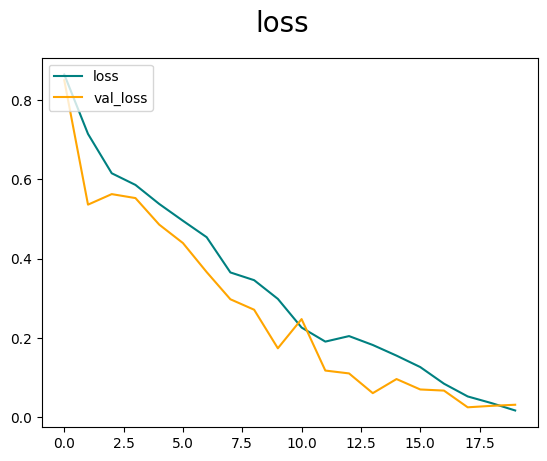

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

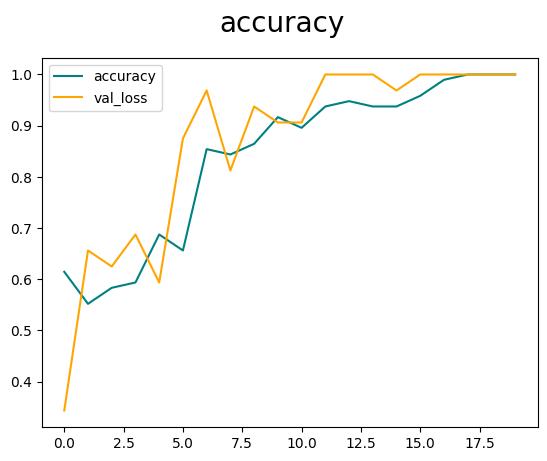

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()


# 4. Evaluate Performance


## 4.1 Evaluate


In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In summary, these metrics offer different perspectives on our model's performance:

- Precision focuses on how well your model correctly predicts positive instances among all instances it predicts as positive.

- Recall focuses on how well your model captures all actual positive instances among all actual positive instances in the dataset.

- BinaryAccuracy provides an overall accuracy metric for binary classification.

In [46]:
# create instances
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 582ms/step


In [48]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 4.2 Test


In [49]:
import cv2

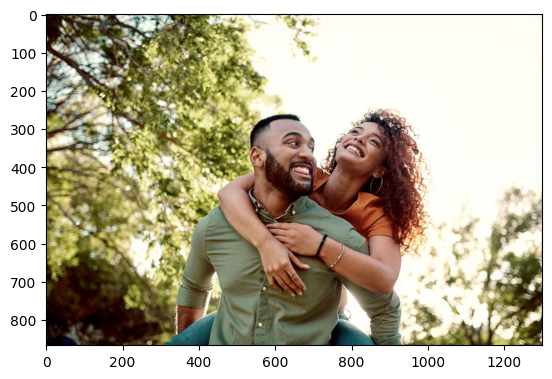

In [74]:
img = cv2.imread('imageclassification/happynesstest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

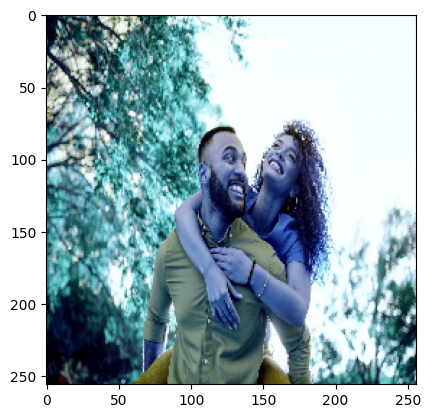

In [75]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [77]:
yhat

array([[9.177291e-05]], dtype=float32)

In [78]:
if yhat > 0.5:
    print(f'Image is sad')
else:
    print(f'image is happy')

image is happy


# 5. Save the model for future use


## 5.1 Save the model

In [79]:
from tensorflow.keras.models import load_model

we can use the load_model module to load saved models

In [80]:
model.save(os.path.join('models', 'happysadmodel.h5'))

c:\Users\BM\ML\machinelearningenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


h5 is what we call seriealization ie saving it into something that can be run on a disk.

In [81]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [82]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 133ms/step


In [83]:
if yhatnew > 0.5:
    print(f'Image is sad')
else:
    print(f'image is happy')

image is happy


1/1 [==============================] - 0s 38ms/step
image is happy


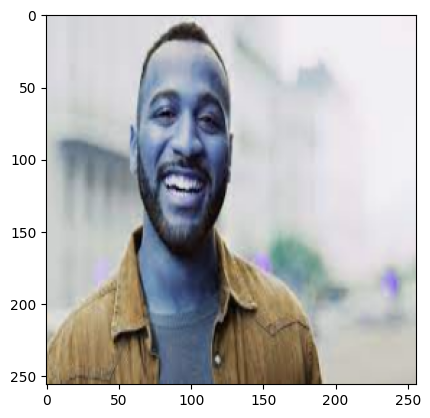

In [86]:
img = cv2.imread('imageclassification/test2.jpg')
resize = tf.image.resize(img, (256,256))
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))
if yhatnew > 0.5:
    print(f'Image is sad')
else:
    print(f'image is happy')
    
plt.imshow(resize.numpy().astype(int))
plt.show()